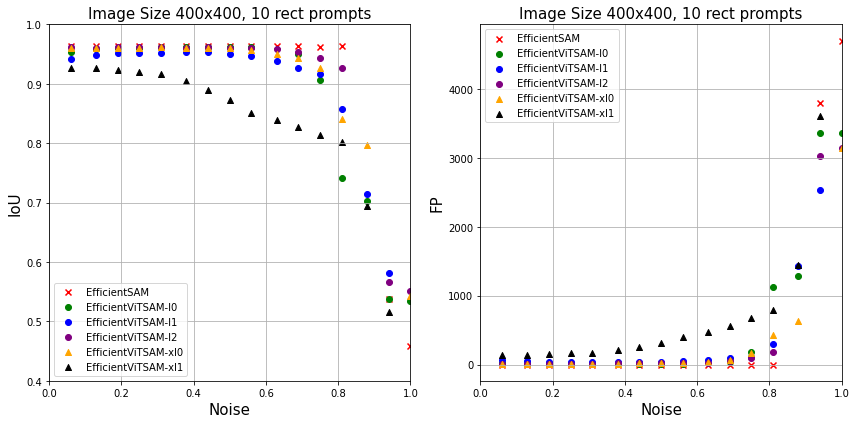

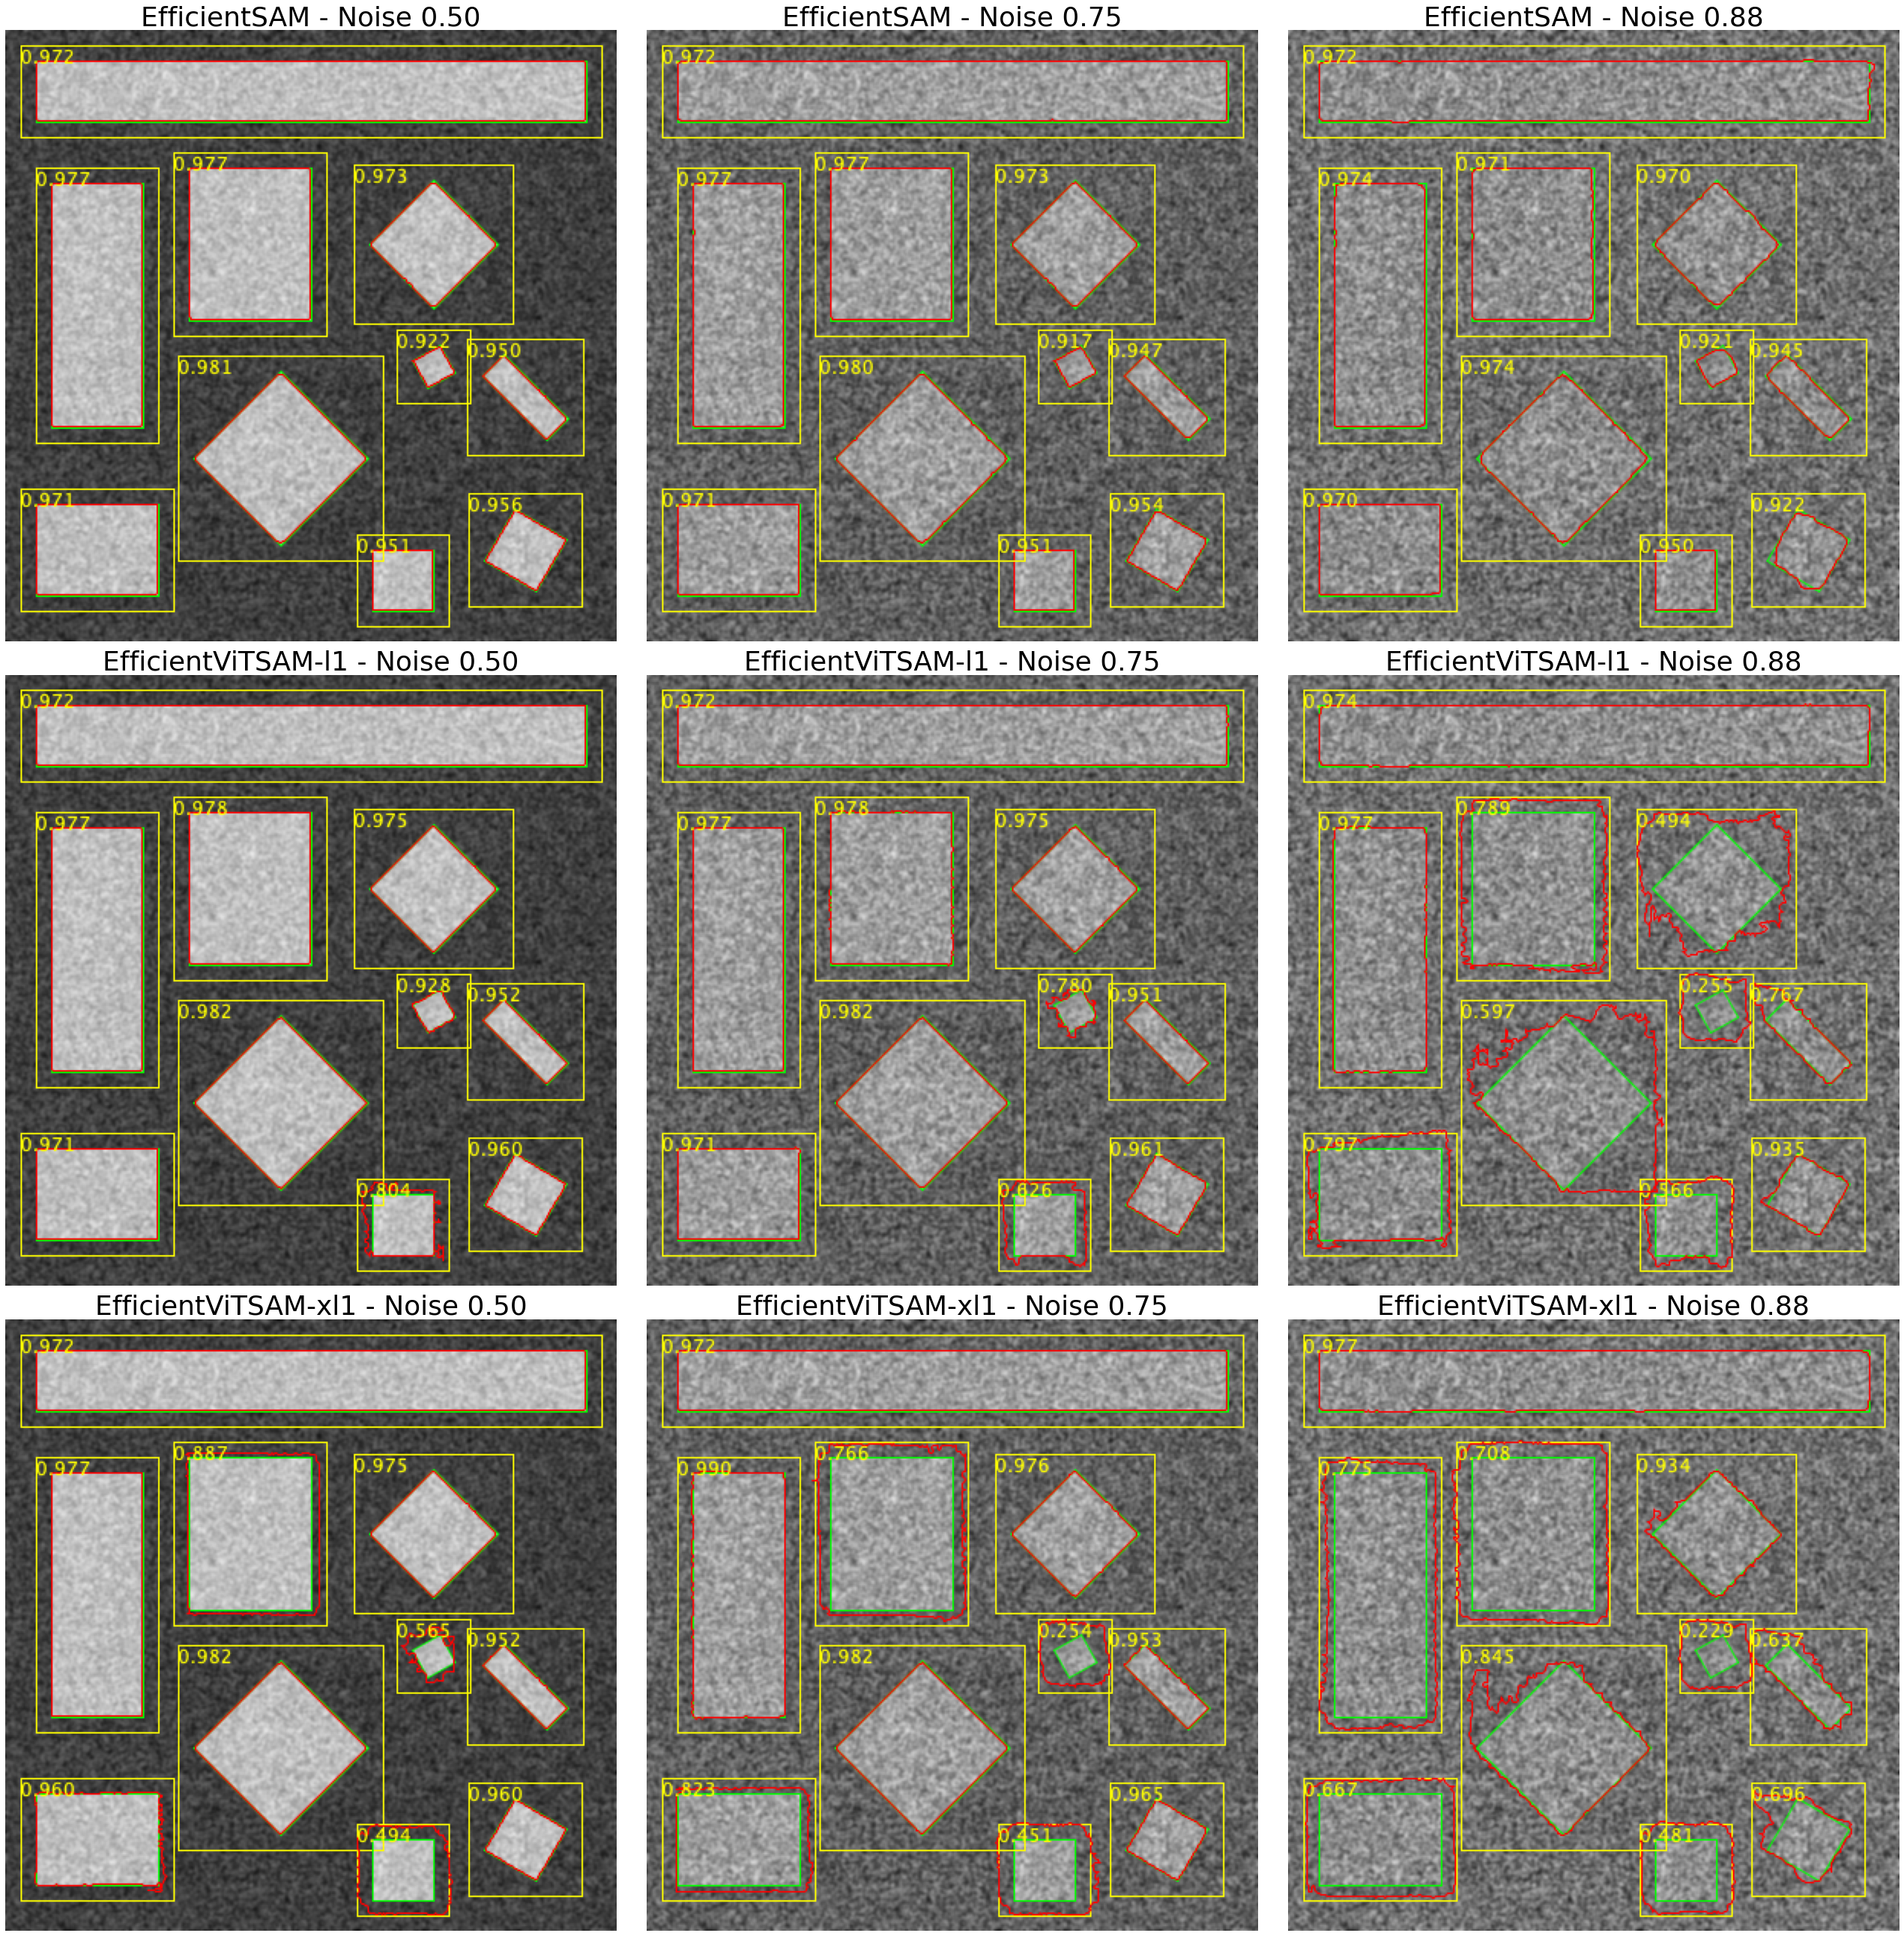

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

df = pd.read_csv('Structural-Noise/result-Structural-Noise.csv')
models = df["Model"].to_numpy()
unique_models = np.unique(models)
nrows = len(models)

#
nobjects = 10

def extract_average_models(header, unique_models, nobjects):
    data_float = df[header].to_numpy().astype(float)
    data_list = {model: [] for model in unique_models}
    for model, data_item in zip(models, data_float):
        data_list[model].append(data_item)
    data_model = []
    for model in np.unique(models):
        arr = np.array(data_list[model])
        mean_list = []
        for i in np.arange(0,len(arr), nobjects):
            mean_list.append(np.mean(arr[i:i+nobjects]))
        data_model.append(mean_list)
    return data_model 

iou_model = extract_average_models("IoU", unique_models, nobjects)
fp_model = extract_average_models("FP", unique_models, nobjects)
noise_model = extract_average_models("Noise", unique_models, nobjects)

## Plot Charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
num_columns = len(iou_model)
colors = ['red', 'green', 'blue', 'purple', 'orange', 'black']
markers = ['x', 'o', 'o', 'o', '^', '^']
s = 36
for i in range(num_columns): 
    axs[0].scatter(noise_model[i][1:], iou_model[i][1:], s=s, marker=markers[i], color=colors[i], label=f'{unique_models[i]}')
    axs[1].scatter(noise_model[i][1:], fp_model[i][1:], s=s, marker=markers[i], color=colors[i], label=f'{unique_models[i]}')

axs[0].set_title(f"Image Size 400x400, 10 rect prompts", fontsize=15)
axs[0].set_xlabel('Noise', fontsize=15)
axs[0].set_xlim([0, 1])
axs[0].set_ylabel('IoU', fontsize=15)
axs[0].set_ylim([0.4, 1])
axs[0].grid(True)
axs[0].legend()

axs[1].set_title(f"Image Size 400x400, 10 rect prompts", fontsize=15)
axs[1].set_xlabel('Noise', fontsize=15)
axs[1].set_xlim([0, 1])
axs[1].set_ylabel('FP', fontsize=15)
axs[1].grid(True)
axs[1].legend()
plt.tight_layout()
plt.savefig('Figure-Structural-Noise.pdf')
plt.show()


def plotimage(c, r, noise, model):
    axs[c,r].imshow(mpimg.imread(f'Structural-Noise/results-{model}-{noise}-160000.png'))
    axs[c,r].axis('off')
    axs[c,r].set_title(f"{model} - Noise {(noise/256):3.2f}", fontsize=36)

fig, axs = plt.subplots(3, 3, figsize=(36, 36))
plotimage(0, 0, 128, 'EfficientSAM')
plotimage(0, 1, 192, 'EfficientSAM')
plotimage(0, 2, 224, 'EfficientSAM')
plotimage(1, 0, 128, 'EfficientViTSAM-l1')
plotimage(1, 1, 192, 'EfficientViTSAM-l1')
plotimage(1, 2, 224, 'EfficientViTSAM-l1')
plotimage(2, 0, 128, 'EfficientViTSAM-xl1')
plotimage(2, 1, 192, 'EfficientViTSAM-xl1')
plotimage(2, 2, 224, 'EfficientViTSAM-xl1')
plt.tight_layout()
plt.savefig('Figure-Structural-Noise-Examples.pdf')
plt.show()
